# Matplotlib for pharmaceutical analysis

## Summary

* All but two drugs (Capomulin and Ramicane; see Tumor Response to Treatment plot) demonstrated decreased Tumor Volume (mm3) over course of the treatment

* The number of metatstatic sites (see Metastatic Spread During Treatment plot) tend to increase over the treatment duration regardless of the drug used. However, overall most drugs tend to have more limited number of metastatic sites over time compare to the placebo control group.

* Groups that received Capomulin and Ramicane demonstrated better surivl rate (%) over time (see Survival During Treatment) compare to other treatment groups and the placebo group.


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#import os
#cwd = os.getcwd()
#cwd

In [3]:
# Hide warning messages in notebook

# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv("./data/mouse_drug_data.csv")
clin = pd.read_csv("./data/clinicaltrial_data.csv")

In [4]:
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
clin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
df = pd.merge(clin, mouse)

# Display the data table for preview
df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_resp_tx = df.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].mean().reset_index()

# Convert to DataFrame
df_resp_tx.head(6)
# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_resp_tx_se = df.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].sem().reset_index()

# Convert to DataFrame
df_resp_tx_se.head(5)

# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
df_resp_tx_piv = df_resp_tx.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
df_resp_tx_piv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
df_resp_tx_se_piv = df_resp_tx_se.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
df_resp_tx_se_piv.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [11]:
list(df_resp_tx_piv.columns.values)[1]

'Ceftamin'

In [12]:
df_resp_tx_piv.loc[:45,'Capomulin']

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

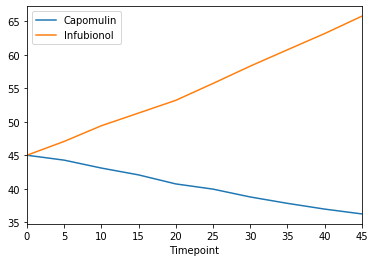

In [13]:
# quick test with two drugs
df_resp_tx_piv.loc[:45,'Capomulin'].plot(label="Capomulin")
df_resp_tx_piv.loc[:45,'Infubinol'].plot(label="Infubionol")

plt.legend()

In [14]:
df_resp_tx_piv.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

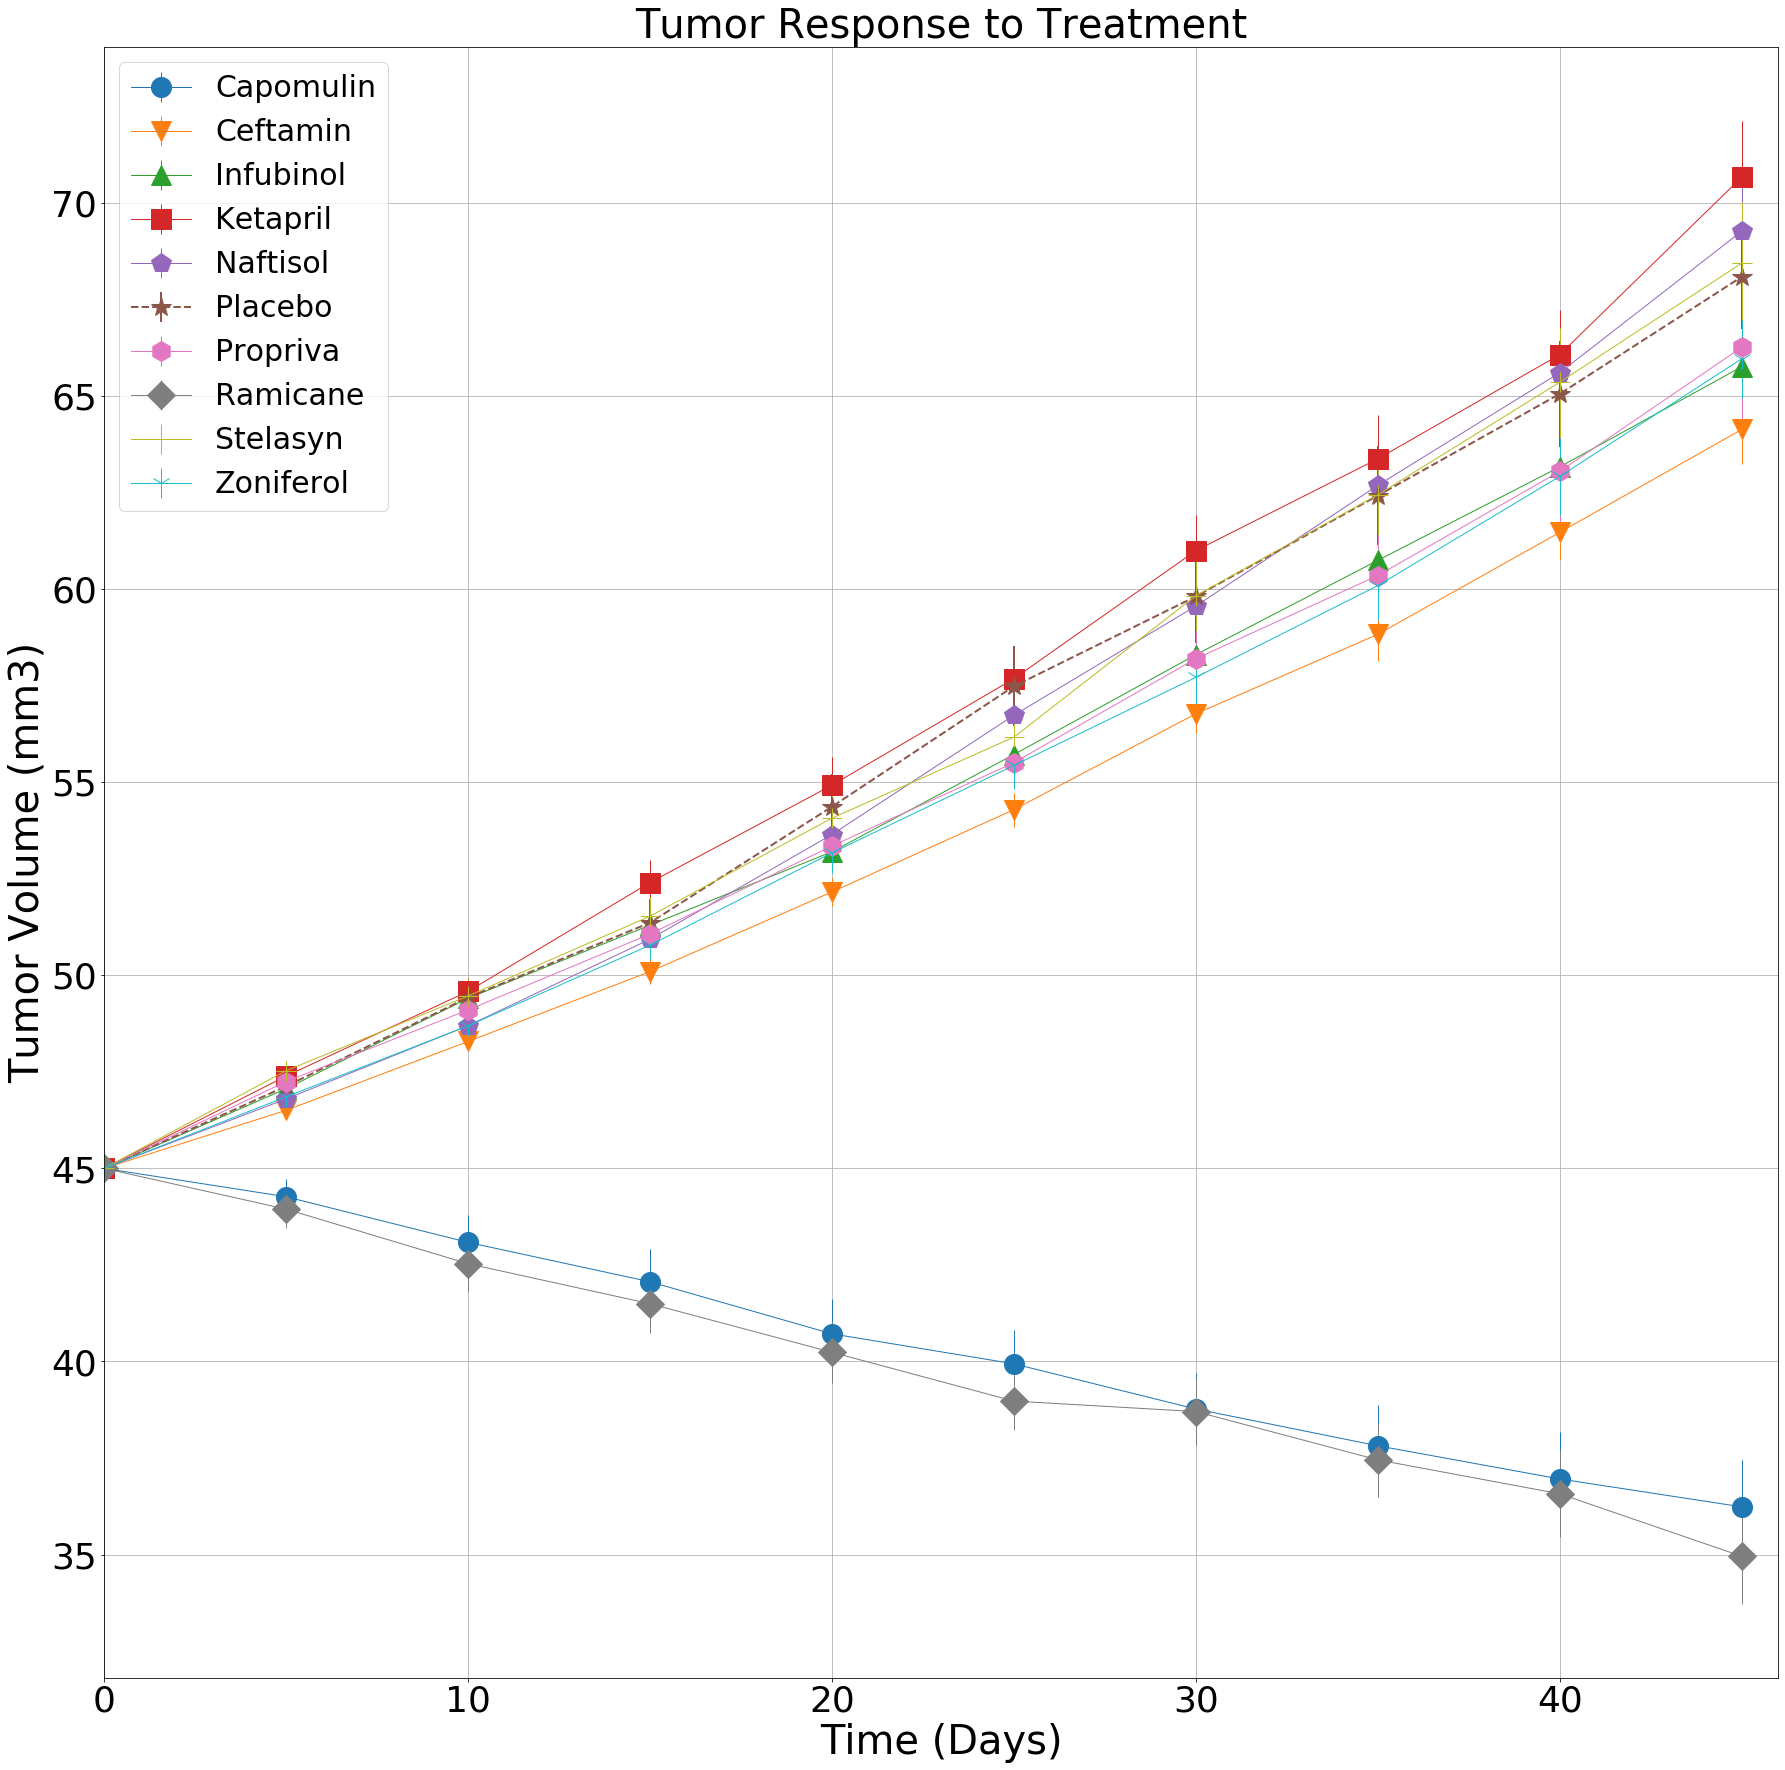

In [15]:
# https://stackoverflow.com/questions/14178194/python-pandas-plotting-options-for-multiple-lines
# https://pydatascience.org/2017/12/05/read-the-data-and-plotting-with-multiple-markers/
# https://stackoverflow.com/questions/39246115/pandas-dataframe-line-plot-show-random-markers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# because there are 10 markers, we first set up the styles for each of the markers
# the loop function zips these style info with the dataframe from earlier so each drug will have an different marker 
# as the loop runs it plots each line based on the specified markers, linewidths and linestyles
markers = ['o', 'v', '^', 's', 'p', '*', 'h', 'D', '+', '1']
linewidths = [1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
linestyles = ['-', '-', '-', '-', '-', '--', '-', '-', '-', '-']
fig, ax = plt.subplots()
for col, marker, lw, linestyle in zip(df_resp_tx_piv.columns, markers, linewidths, linestyles):
    df_resp_tx_piv[col].plot(yerr=df_resp_tx_se_piv[col], linestyle=linestyle, lw=lw, marker=marker, markersize = 20, figsize=(30,30))

plt.legend(loc=2, prop={'size': 30})
plt.grid()
plt.xticks(fontsize=36, rotation=0)
plt.yticks(fontsize=36, rotation=0)
plt.xlim(0,max(df_resp_tx_piv.index.values)+1)
plt.xlabel('Time (Days)', fontsize=40)
plt.ylabel('Tumor Volume (mm3)', fontsize=40)
plt.title('Tumor Response to Treatment', fontsize=40)

plt.savefig("../Plots/Plot1_diff_markers.png")

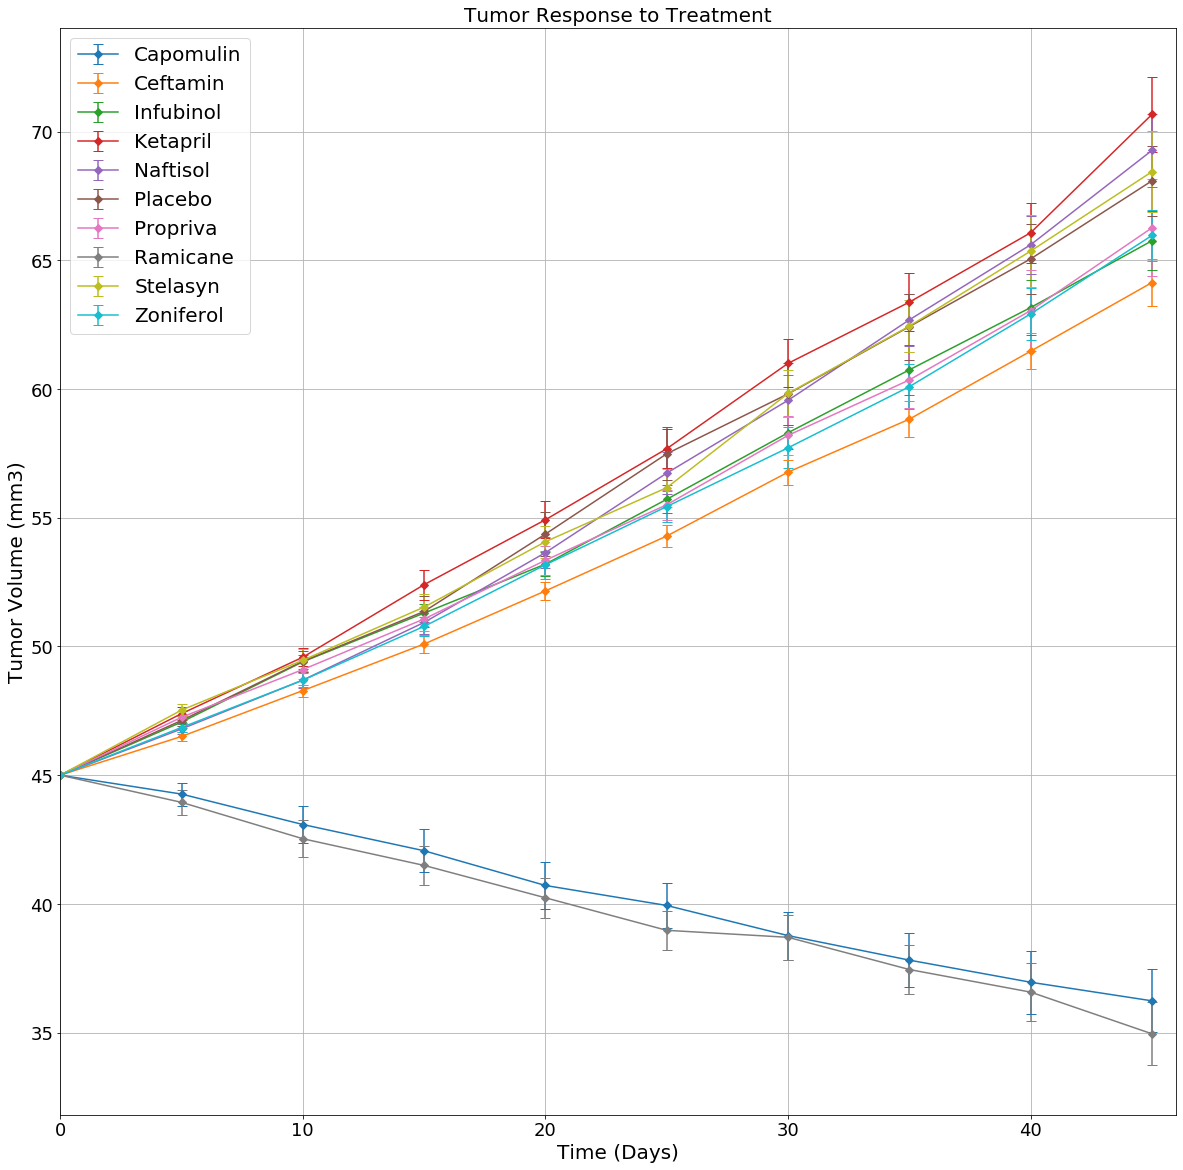

In [16]:
# without using the loop function above we can also generate a plot where all markers are the same
# Generate the Plot (with Error Bars)
import matplotlib.pyplot as plt
df_resp_tx_piv.plot(marker = 'D', yerr=df_resp_tx_se_piv, capsize=5, kind='line', figsize=(20,20))
plt.legend(loc=2, prop={'size': 20})
plt.grid()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.xlim(0,max(df_resp_tx_piv.index.values)+1)
plt.xlabel('Time (Days)', fontsize=20)
plt.ylabel('Tumor Volume (mm3)', fontsize=20)
plt.title('Tumor Response to Treatment', fontsize=20)

plt.savefig("../Plots/Plot1_same_markers.png")
# Save the Figure

In [ ]:
## BELOW IS FROM GUIDE

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
df_site = df.groupby(['Drug', 'Timepoint'])[['Metastatic Sites']].mean().reset_index()
df_site.head(5)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [6]:
## BELOW IS FROM GUIDE

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
df_site_se = df.groupby(['Drug', 'Timepoint'])[['Metastatic Sites']].sem().reset_index()
df_site_se.head(5)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [7]:
## BELOW IS FROM GUIDE

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [19]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
df_site_piv = df_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
df_site_piv.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [20]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
df_site_se_piv = df_site_se.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
df_site_se_piv.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [8]:
## BELOW IS FROM GUIDE

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


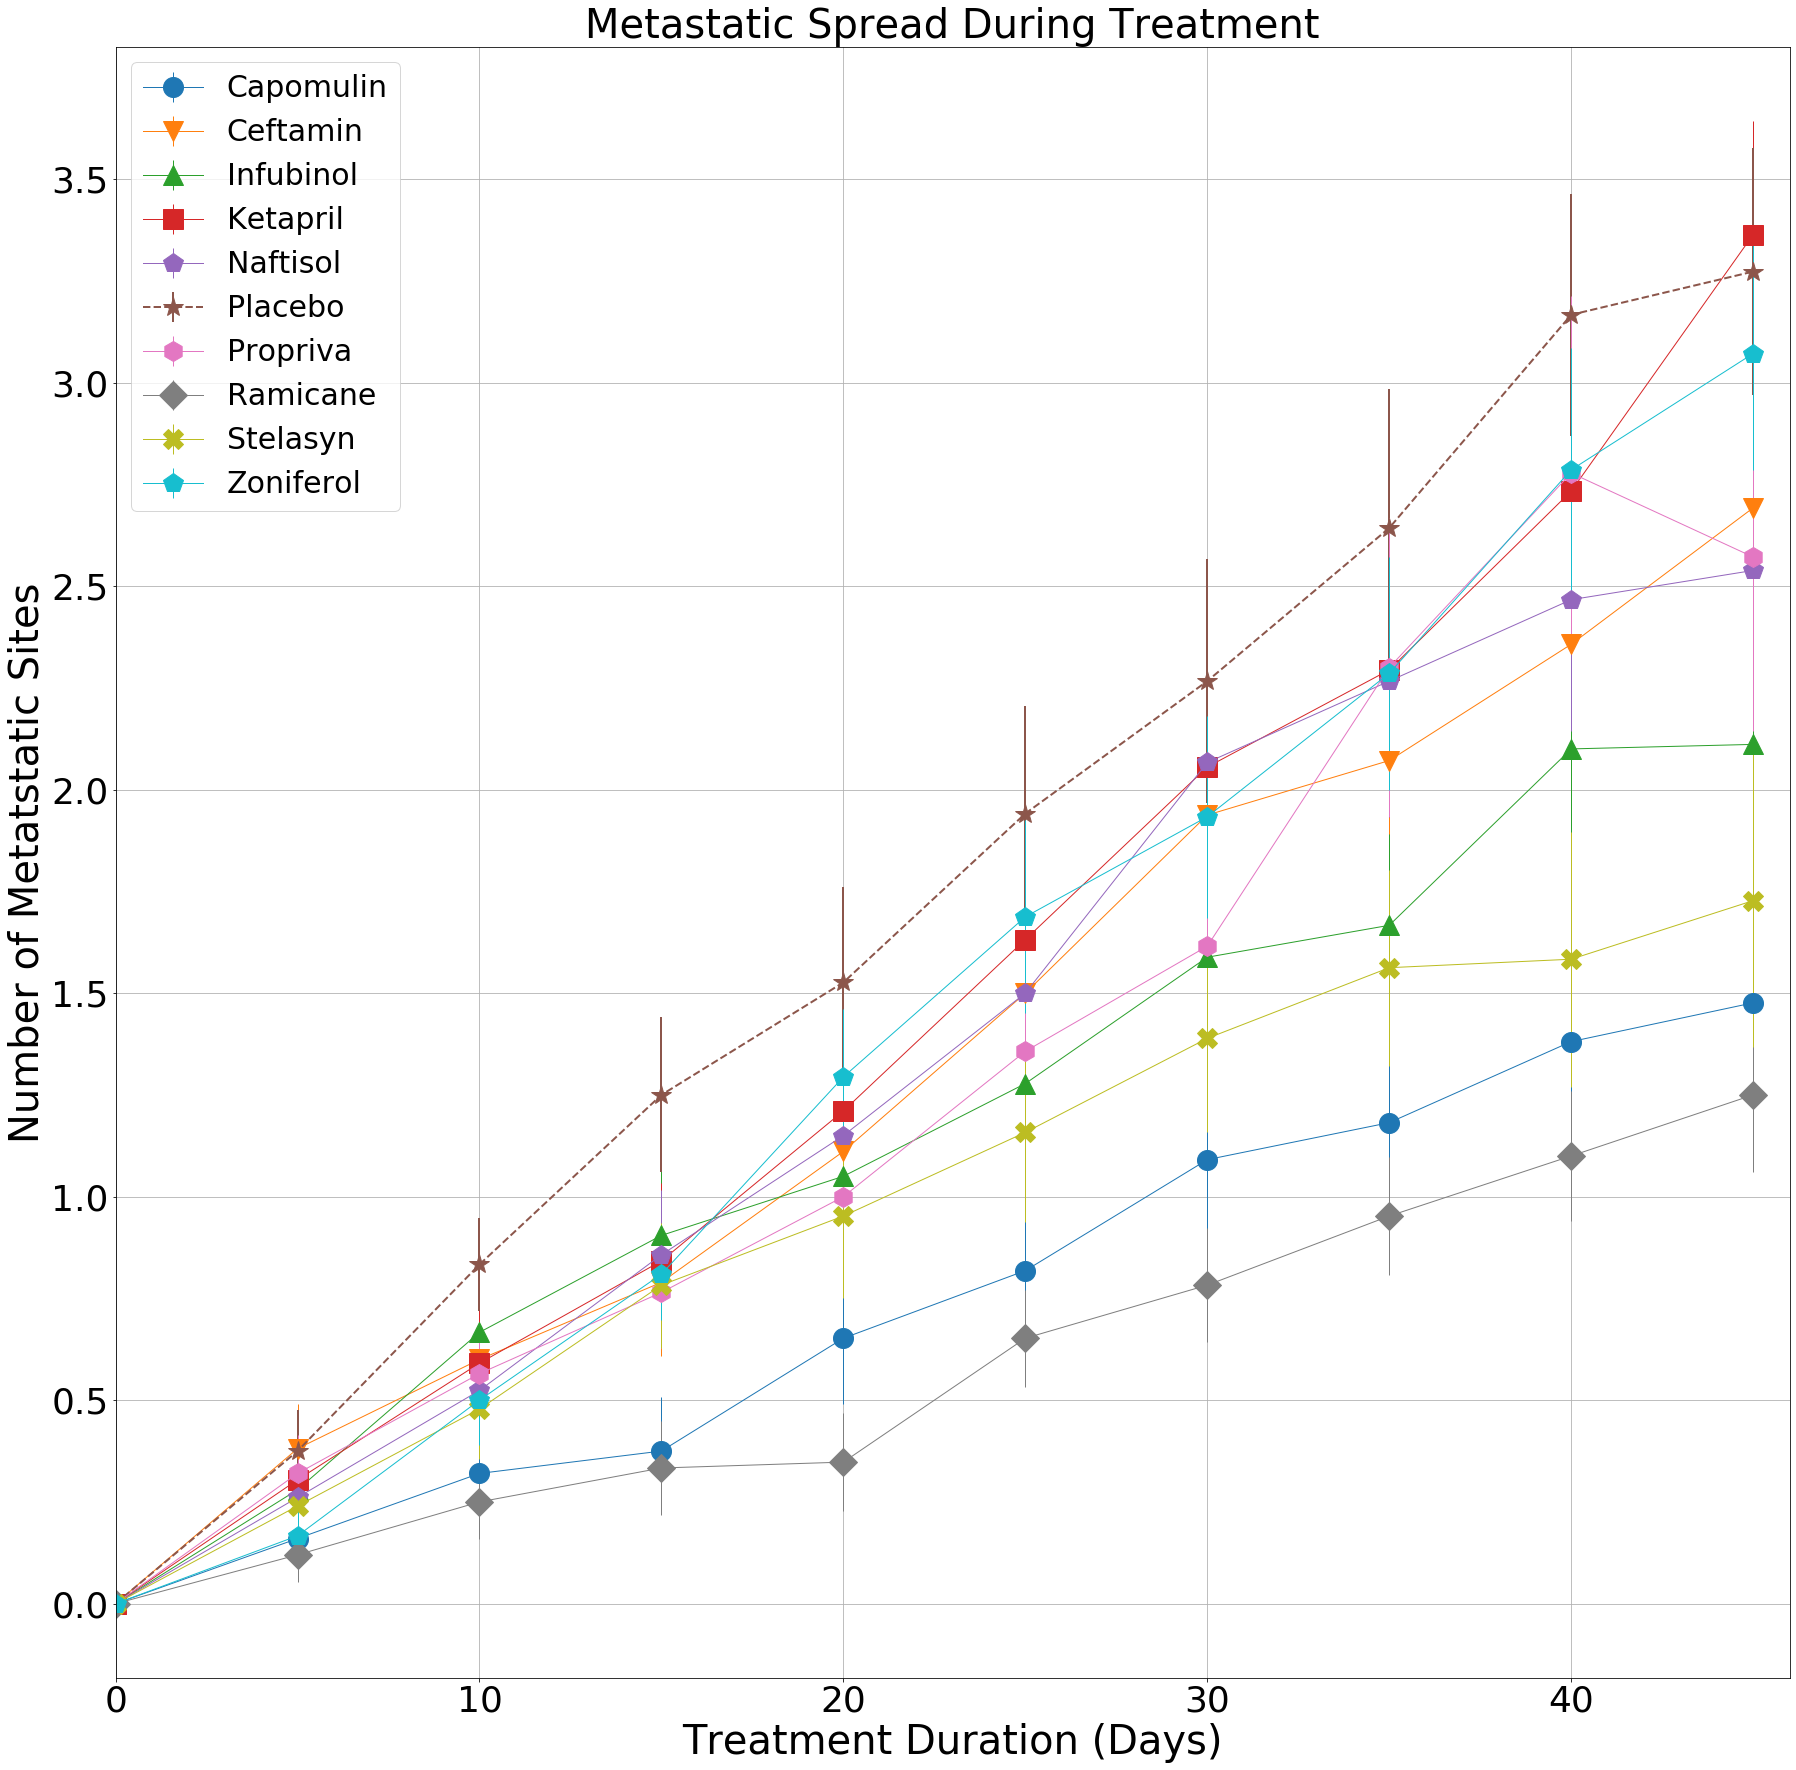

In [21]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

# https://stackoverflow.com/questions/14178194/python-pandas-plotting-options-for-multiple-lines

# see explanation from earlier plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

markers = ['o', 'v', '^', 's', 'p', '*', 'h', 'D', 'X', 'p']
linewidths = [1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
linestyles = ['-', '-', '-', '-', '-', '--', '-', '-', '-', '-']
fig, ax = plt.subplots()
for col, marker, lw, linestyle in zip(df_site_piv.columns, markers, linewidths, linestyles):
    df_site_piv[col].plot(yerr=df_site_se_piv[col], linestyle=linestyle, lw=lw, marker=marker, markersize = 20, figsize=(30,30))

plt.legend(loc=2, prop={'size': 30})
plt.grid()
plt.xticks(fontsize=36, rotation=0)
plt.yticks(fontsize=36, rotation=0)
plt.xlim(0,max(df_resp_tx_piv.index.values)+1)
plt.xlabel('Treatment Duration (Days)', fontsize=40)
plt.ylabel('Number of Metatstatic Sites', fontsize=40)
plt.title('Metastatic Spread During Treatment', fontsize=40)

plt.savefig("../Plots/Plot2_metastatic_spread.png")



In [ ]:
## BELOW IS FROM GUIDE

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
df_mice = df.groupby(['Drug', 'Timepoint'])[['Mouse ID']].nunique().reset_index()
df_mice_count = df_mice.rename(columns={'Mouse ID': 'Mouse Count'}) 
df_mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [10]:
# BELOW IS FROM GUIDE

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [23]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
df_mice_count_piv = df_mice_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
df_mice_count_piv.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [24]:
df_mice_count_piv.ix[0]

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     25
Zoniferol    25
Name: 0, dtype: int64

In [25]:
# [convert to percentage with respect to time 0]
# https://stackoverflow.com/questions/12007406/divide-dataframe-by-first-row
df_mice_count_piv_pct = df_mice_count_piv.divide(df_mice_count_piv.ix[0]/100)
df_mice_count_piv_pct.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


In [11]:
# BELOW IS FROM GUIDE

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


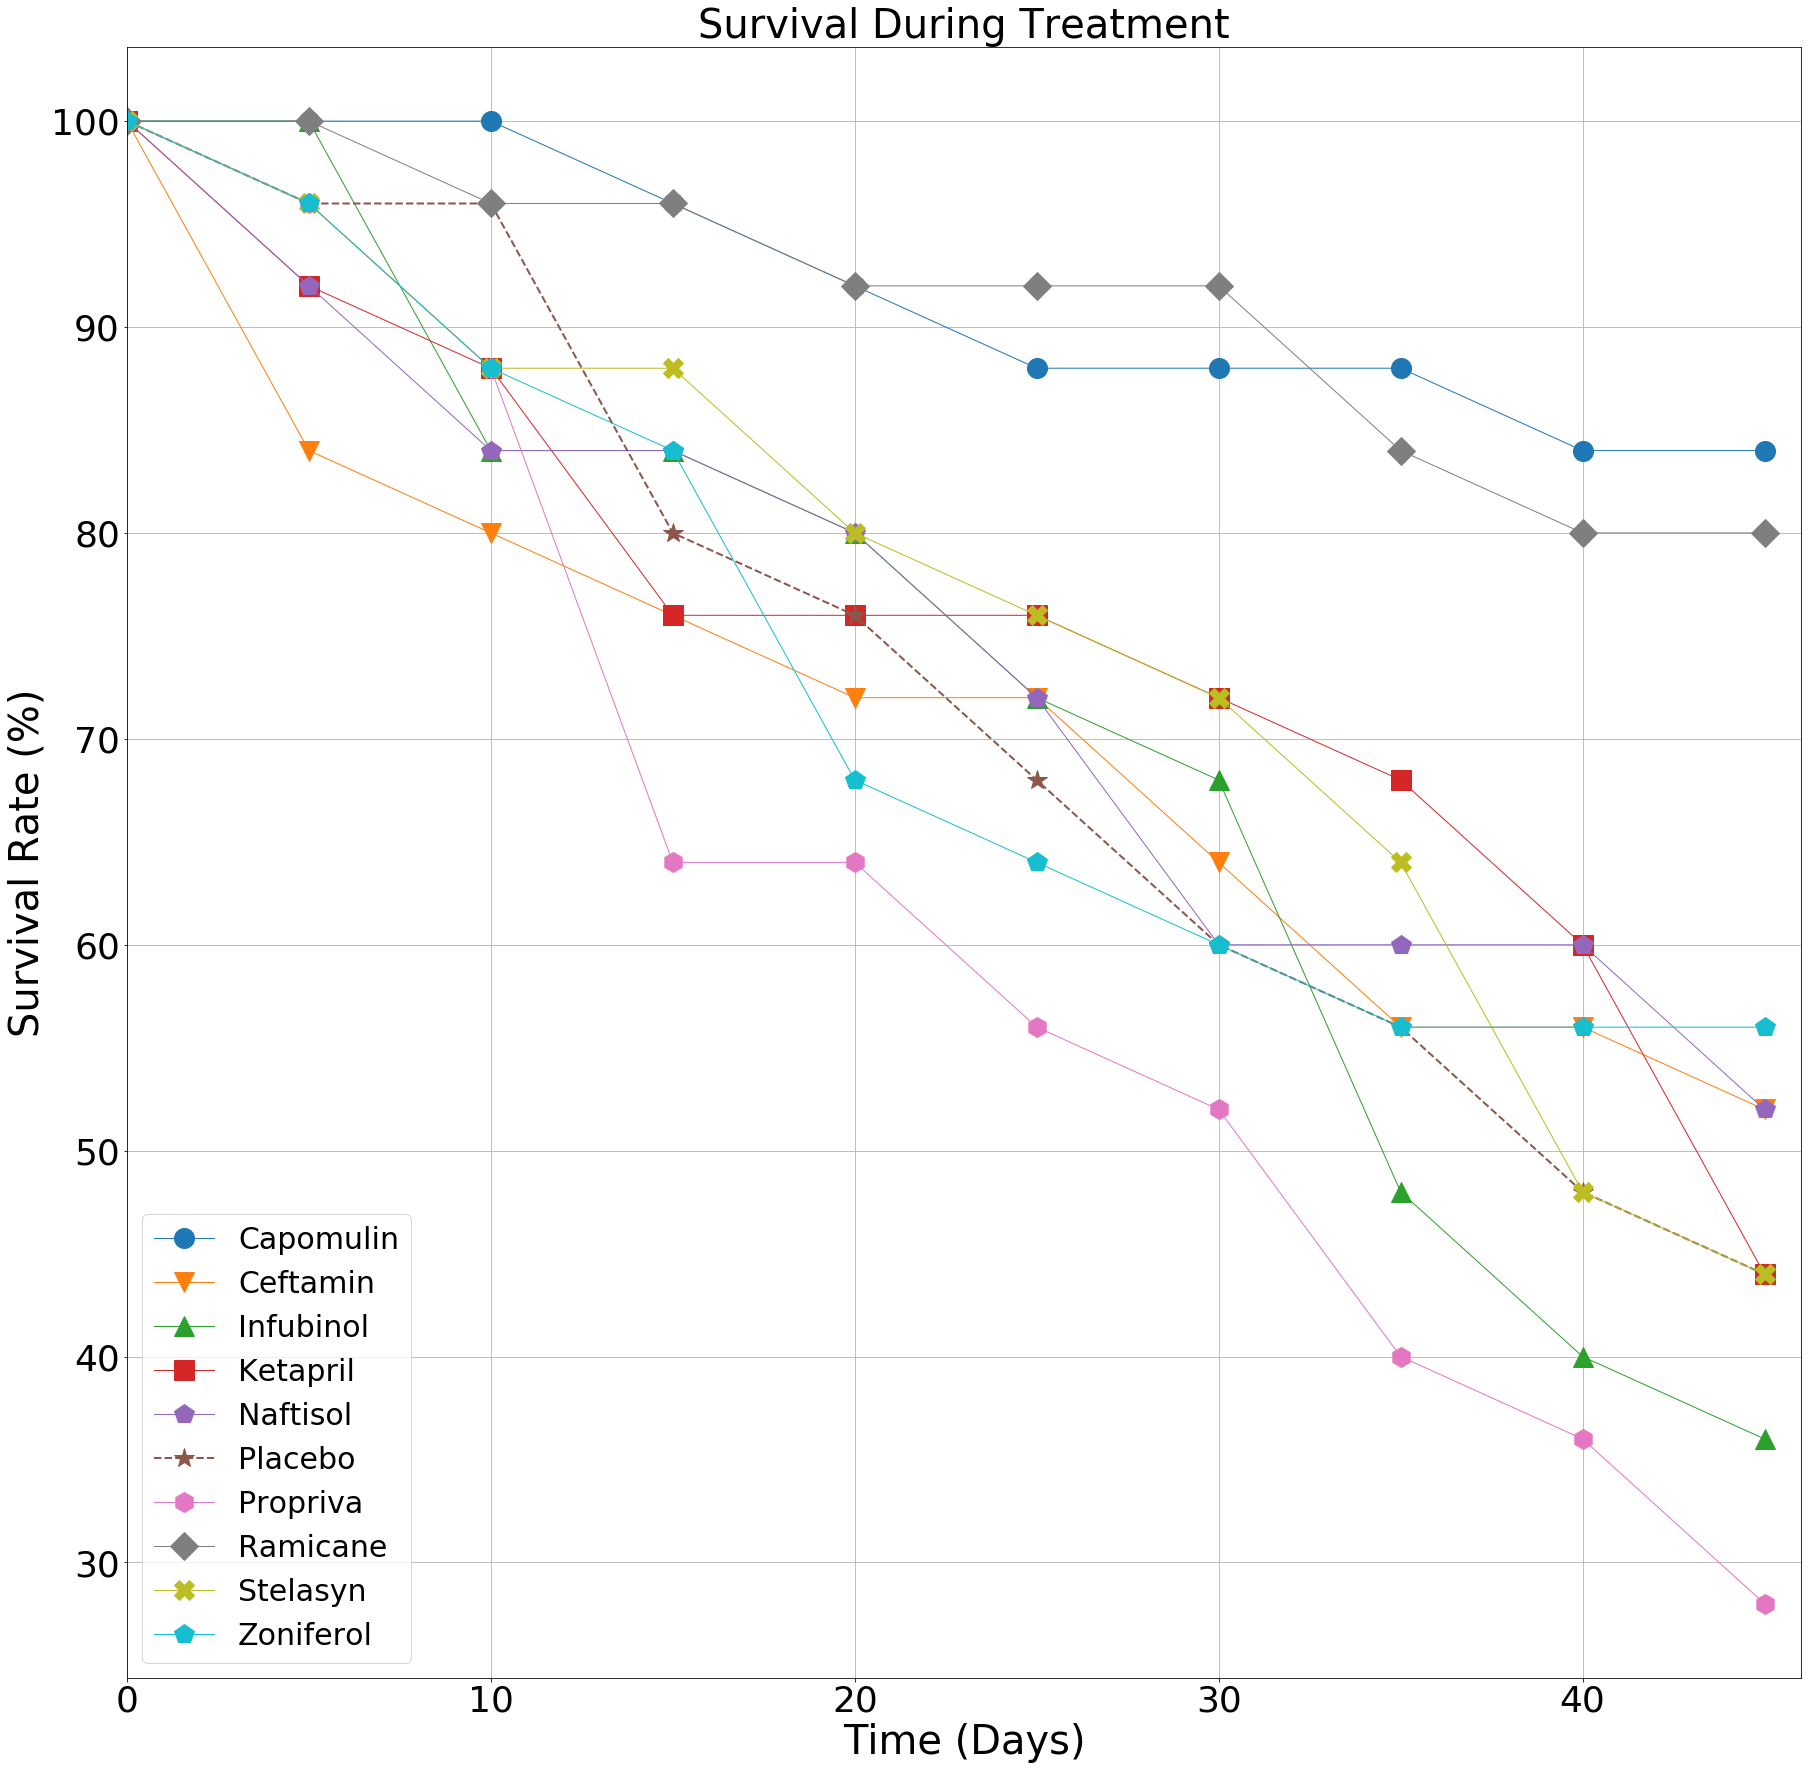

In [27]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

markers = ['o', 'v', '^', 's', 'p', '*', 'h', 'D', 'X', 'p']
linewidths = [1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
linestyles = ['-', '-', '-', '-', '-', '--', '-', '-', '-', '-']
fig, ax = plt.subplots()
for col, marker, lw, linestyle in zip(df_site_piv.columns, markers, linewidths, linestyles):
    df_mice_count_piv_pct[col].plot( linestyle=linestyle, lw=lw, marker=marker, markersize = 20, figsize=(30,30))
    
    
plt.legend(loc='best', prop={'size': 30})
plt.grid()
plt.xticks(fontsize=36, rotation=0)
plt.yticks(fontsize=36, rotation=0)
plt.xlim(0,max(df_resp_tx_piv.index.values)+1)
plt.xlabel('Time (Days)', fontsize=40)
plt.ylabel('Survival Rate (%)', fontsize=40)
plt.title('Survival During Treatment', fontsize=40)

plt.savefig("../Plots/Plot3_survival.png")

In [ ]:
# BELOW IS FROM GUIDE

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [28]:
df_tumor_change = df.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].mean().reset_index()
df_tumor_change.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [29]:
df_tumor_change_piv = df_tumor_change.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
df_tumor_change_piv.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [30]:
df_tumor_change_piv.ix[45]

Drug
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: 45, dtype: float64

In [31]:
# Calculate the percent changes for each drug
# Display the data to confirm
# https://stackoverflow.com/questions/12007406/divide-dataframe-by-first-row
# https://www.geeksforgeeks.org/python-pandas-dataframe-ix/

# [convert to percentage with respect to time 0]
df_tumor_change_piv_pct = (df_tumor_change_piv.ix[45]-df_tumor_change_piv.ix[0])/df_tumor_change_piv.ix[0]*100
print(df_tumor_change_piv_pct)
type(df_tumor_change_piv_pct)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


pandas.core.series.Series

In [13]:
# BELOW FROM GUIDE

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [32]:
# Store all Relevant Percent Changes into a Tuple
df_change = tuple(df_tumor_change_piv_pct[:])
df_change_drugs = tuple(df_tumor_change_piv_pct.index)

In [33]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure
### https://stackoverflow.com/questions/31590184/plot-multicolored-line-based-on-conditional-in-python

# rather than using the tuples from earlier, it makes more sense to use existing data frame from earlier (df_tumor_change_piv_pct) instead

df_tumor_change_toplot = pd.DataFrame({'Drug': df_tumor_change_piv_pct.index, 'Pct Vol Change':df_tumor_change_piv_pct.values})
df_tumor_change_toplot

,Drug,Pct Vol Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [34]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
df_tumor_change_toplot['positive'] = df_tumor_change_toplot['Pct Vol Change'] > 0
df_tumor_change_sorted = df_tumor_change_toplot.sort_values('Pct Vol Change', ascending=True)
#df_tumor_change_sorted.style.format({'Pct Vol Change': "{:,.1f}"})
df_tumor_change_sorted = df_tumor_change_sorted.round(1)
df_tumor_change_sorted

,Drug,Pct Vol Change,positive
7,Ramicane,-22.3,False
0,Capomulin,-19.5,False
1,Ceftamin,42.5,True
2,Infubinol,46.1,True
9,Zoniferol,46.6,True
6,Propriva,47.2,True
5,Placebo,51.3,True
8,Stelasyn,52.1,True
4,Naftisol,53.9,True
3,Ketapril,57.0,True


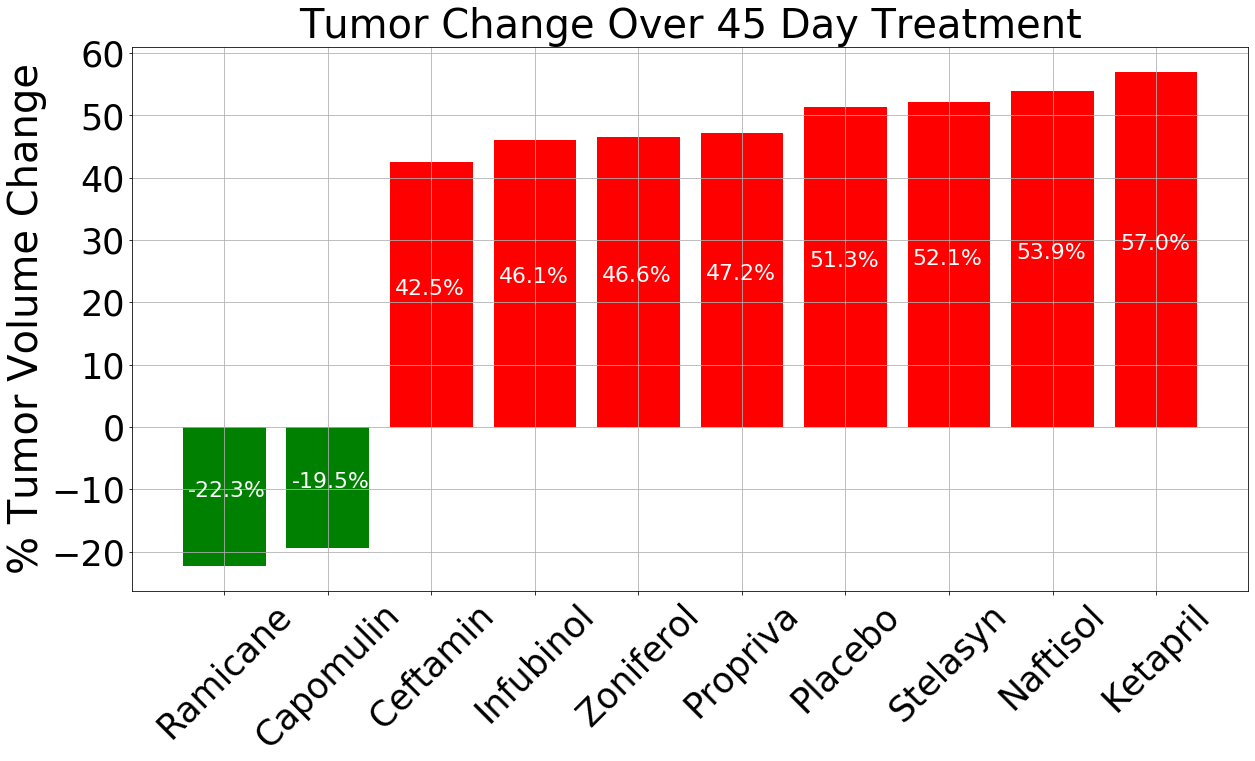

In [35]:
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure

# alternative way to color the bars differently based on tumor change negative or positive
# df_tumor_change_toplot['colors'] = 'r'
# df_tumor_change_sorted['positive'] = df_tumor_change_sorted['Pct Vol Change'] > 0

# here we do the bar plot
# the color is specified based the Pct Vol Change as either True or False (for pos change)
# via color=df_tumor_change_sorted.positive.map({True: 'r', False: 'g'})

plt.figure(figsize=(20,10))
plt.bar(df_tumor_change_sorted['Drug'], df_tumor_change_sorted['Pct Vol Change'], color=df_tumor_change_sorted.positive.map({True: 'r', False: 'g'}))
plt.grid()
plt.xticks(fontsize=35, rotation=45)
plt.yticks(fontsize=35, rotation=0)
# plt.xlabel('Time (Days)', fontsize=40)
plt.ylabel('% Tumor Volume Change', fontsize=40)
plt.title('Tumor Change Over 45 Day Treatment', fontsize=40)

xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
for i, v in enumerate(df_tumor_change_sorted['Pct Vol Change']):
    plt.text(xlocs[i] - 1.35, v*0.5, (str(v)+'%'), fontsize=22, color='white')

plt.savefig("../Plots/Plot4_bargraph.png")

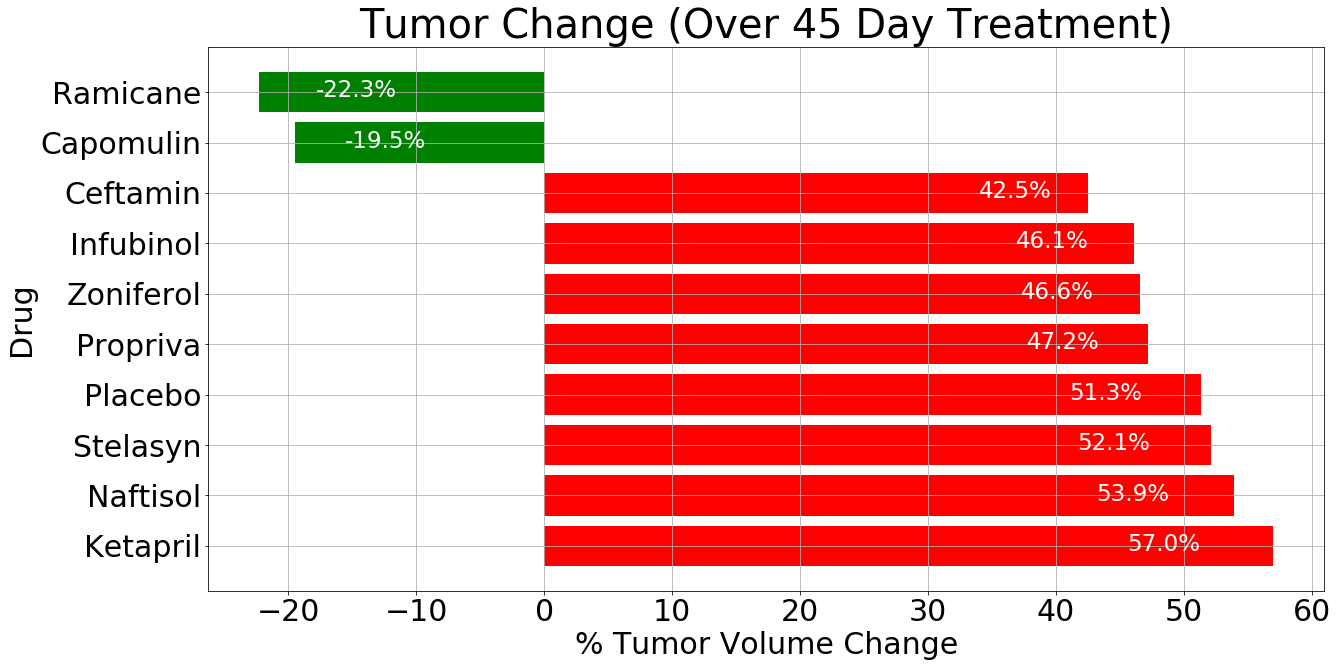

In [36]:
# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure

# here it might actually make more sense to do a horizontal bar plot for clarity

df_tumor_change_sortedV = df_tumor_change_toplot.sort_values('Pct Vol Change', ascending=False)
df_tumor_change_sortedV = df_tumor_change_sortedV.round(1)
df_tumor_change_sortedV

plt.figure(figsize=(20,10))
plt.barh(df_tumor_change_sortedV['Drug'], df_tumor_change_sortedV['Pct Vol Change'], color=df_tumor_change_sortedV.positive.map({True: 'r', False: 'g'}))
plt.grid()
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.xlabel('% Tumor Volume Change', fontsize=30)
plt.ylabel('Drug', fontsize=30)
plt.title('Tumor Change (Over 45 Day Treatment)', fontsize=40)

ylocs, ylabs = plt.yticks()
ylocs=[i+1 for i in range(0,10)]
for i, v in enumerate(df_tumor_change_sortedV['Pct Vol Change']):
    plt.text(v*0.8, ylocs[i] - 1.1, (str(v)+'%'), fontsize=23, color='white')
    
plt.savefig("../Plots/Plot4_Hbargraph.png")

In [ ]:
# BELOW IS EXAMPLE FROM GUIDE
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)